# SIFT Matching - Grocery Store

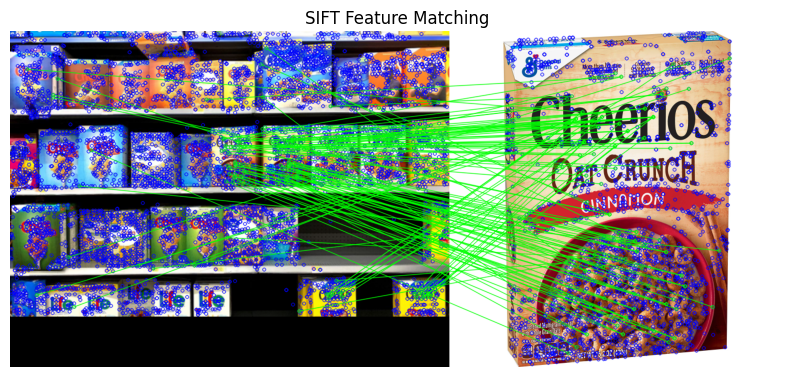

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image = cv.imread('store/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None

template = cv.imread('store/oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

# Resize the image and template
resized_image = cv.resize(image, None, fx=1.5, fy=1.5)  # Increase image size by 1.5 times
resized_template = cv.resize(template, None, fx=0.5, fy=0.5)  # Decrease template size by 0.5 times

# Create a SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(resized_image, None)
kp2, des2 = sift.detectAndCompute(resized_template, None)

# Create a FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

# Find matches
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to get good matches 
matchesMask = [[0, 0] for _ in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Draw matches
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)
img = cv.drawMatchesKnn(resized_image, kp1, resized_template, kp2, matches, None, **draw_params)

# Display the result
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()


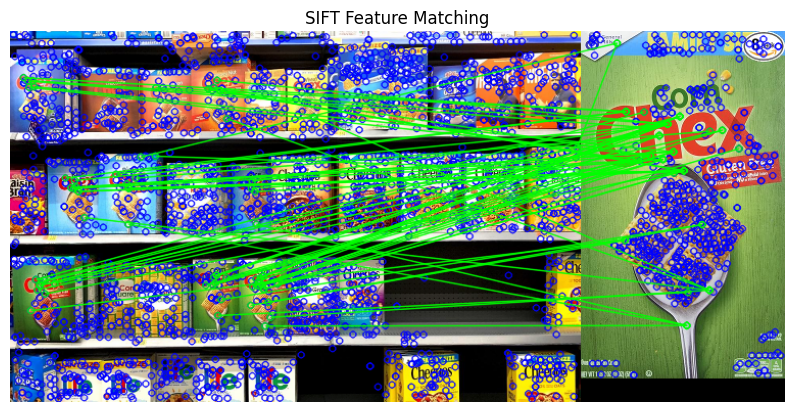

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image = cv.imread('store/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None

template = cv.imread('store/corn_chex.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

# Create a SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

# Create a FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params, search_params)

# Find matches
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to get good matches 
# Need to draw only good matches, so create a mask 
matchesMask = [[0, 0] for _ in range(len(matches))]

# ration test as Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Draw matches
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)
img = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **draw_params)

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()

# SIFT Matching - Book Store

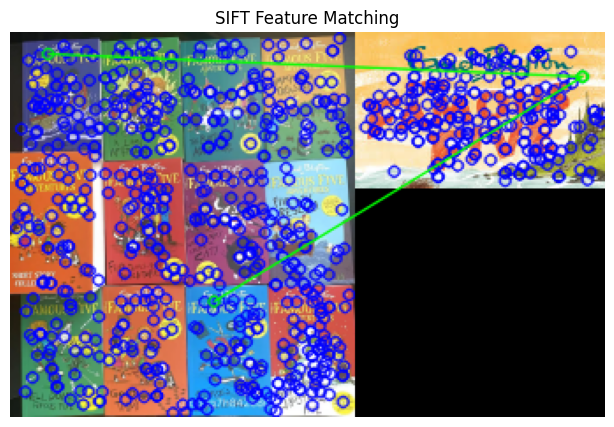

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image = cv.imread('books/famous five books.png', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None

template = cv.imread('books/famous five.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

# Resize the image 
resized_image = cv.resize(image, None, fx=0.5, fy=0.5)
resized_template = cv.resize(template, None, fx=2.0, fy=2.0)

# Create a SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(resized_image, None)
kp2, des2 = sift.detectAndCompute(template, None)

# Create a FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

# Find matches
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to get good matches
matchesMask = [[0, 0] for _ in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Draw matches
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)
img = cv.drawMatchesKnn(resized_image, kp1, template, kp2, matches, None, **draw_params)

# Display the result
plt.figure(figsize=(15, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()


# SIFT Matching - Image Collage

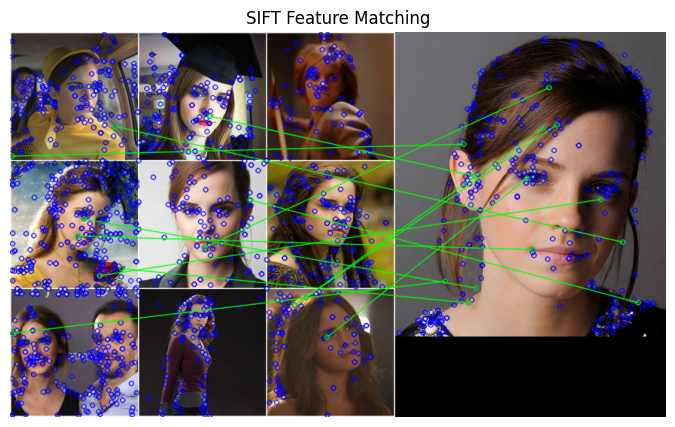

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image = cv.imread('emma/emma collage.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None

template = cv.imread('emma/emma.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

# Resize the image 
resized_image = cv.resize(image, None, fx=1, fy=1)
resized_template = cv.resize(template, None, fx=0.5, fy=0.5)

# Create a SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(resized_image, None)
kp2, des2 = sift.detectAndCompute(template, None)

# Create a FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

# Find matches
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to get good matches
matchesMask = [[0, 0] for _ in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Draw matches
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)
img = cv.drawMatchesKnn(resized_image, kp1, template, kp2, matches, None, **draw_params)

# Display the result
plt.figure(figsize=(15, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()
